In [40]:
import shutil
from pathlib import Path
import random
import jpeg4py as jpeg
import matplotlib.pyplot as plt
import pandas as pd
import shutil


In [3]:
dataset_dir = Path("../other_datasets/VideoMatte240K_JPEG_SD")
train_dir = dataset_dir / "train"
test_dir = dataset_dir / "test"


In [15]:
subdirs = [str(x).split('/')[-1] for x in (train_dir / "fgr").iterdir() if x.is_dir()]
#subdirs = list(map(lambda x: f"{x:04d}", subdirs))
random.shuffle(subdirs)
print(subdirs)

['0093', '0327', '0409', '0141', '0412', '0468', '0121', '0335', '0031', '0029', '0340', '0367', '0022', '0214', '0311', '0397', '0341', '0185', '0003', '0108', '0073', '0353', '0294', '0148', '0373', '0243', '0433', '0434', '0169', '0045', '0120', '0455', '0358', '0132', '0023', '0436', '0417', '0254', '0388', '0323', '0334', '0390', '0077', '0441', '0042', '0204', '0057', '0252', '0425', '0179', '0339', '0008', '0426', '0069', '0221', '0096', '0146', '0362', '0147', '0197', '0314', '0086', '0381', '0356', '0033', '0070', '0283', '0020', '0324', '0084', '0040', '0115', '0024', '0312', '0196', '0161', '0151', '0091', '0466', '0187', '0290', '0384', '0224', '0094', '0418', '0239', '0250', '0230', '0376', '0392', '0034', '0126', '0454', '0267', '0273', '0013', '0234', '0375', '0422', '0193', '0058', '0403', '0276', '0156', '0143', '0257', '0453', '0128', '0259', '0281', '0445', '0080', '0431', '0201', '0149', '0158', '0137', '0277', '0427', '0041', '0394', '0167', '0135', '0379', '0085',

In [16]:
subdirs

['0093',
 '0327',
 '0409',
 '0141',
 '0412',
 '0468',
 '0121',
 '0335',
 '0031',
 '0029',
 '0340',
 '0367',
 '0022',
 '0214',
 '0311',
 '0397',
 '0341',
 '0185',
 '0003',
 '0108',
 '0073',
 '0353',
 '0294',
 '0148',
 '0373',
 '0243',
 '0433',
 '0434',
 '0169',
 '0045',
 '0120',
 '0455',
 '0358',
 '0132',
 '0023',
 '0436',
 '0417',
 '0254',
 '0388',
 '0323',
 '0334',
 '0390',
 '0077',
 '0441',
 '0042',
 '0204',
 '0057',
 '0252',
 '0425',
 '0179',
 '0339',
 '0008',
 '0426',
 '0069',
 '0221',
 '0096',
 '0146',
 '0362',
 '0147',
 '0197',
 '0314',
 '0086',
 '0381',
 '0356',
 '0033',
 '0070',
 '0283',
 '0020',
 '0324',
 '0084',
 '0040',
 '0115',
 '0024',
 '0312',
 '0196',
 '0161',
 '0151',
 '0091',
 '0466',
 '0187',
 '0290',
 '0384',
 '0224',
 '0094',
 '0418',
 '0239',
 '0250',
 '0230',
 '0376',
 '0392',
 '0034',
 '0126',
 '0454',
 '0267',
 '0273',
 '0013',
 '0234',
 '0375',
 '0422',
 '0193',
 '0058',
 '0403',
 '0276',
 '0156',
 '0143',
 '0257',
 '0453',
 '0128',
 '0259',
 '0281',
 '0445',
 

In [19]:
train_frac = 0.7
val_frac = 0.15
test_frac = 1 - train_frac - val_frac
train_size = int(train_frac * len(subdirs))
val_size = int(val_frac * len(subdirs))

train_subdirs = subdirs[:train_size]
val_subdirs = subdirs[train_size: train_size + val_size]
test_subdirs = subdirs[train_size + val_size:]

In [29]:
plt.rcParams["figure.figsize"] = (20,15)

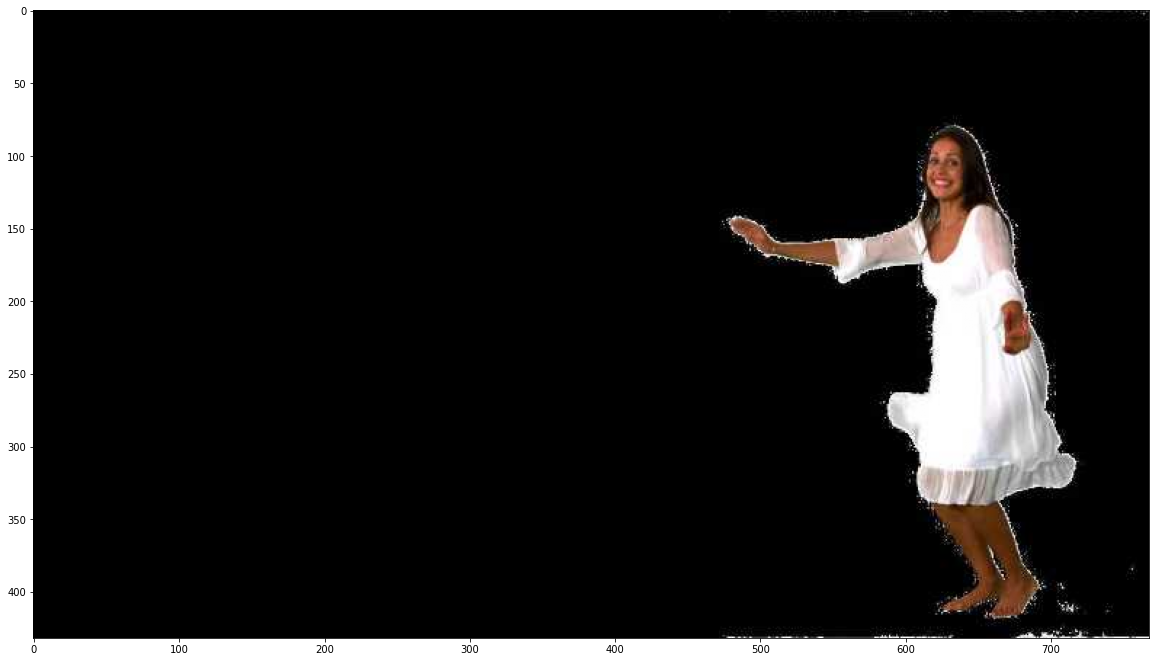

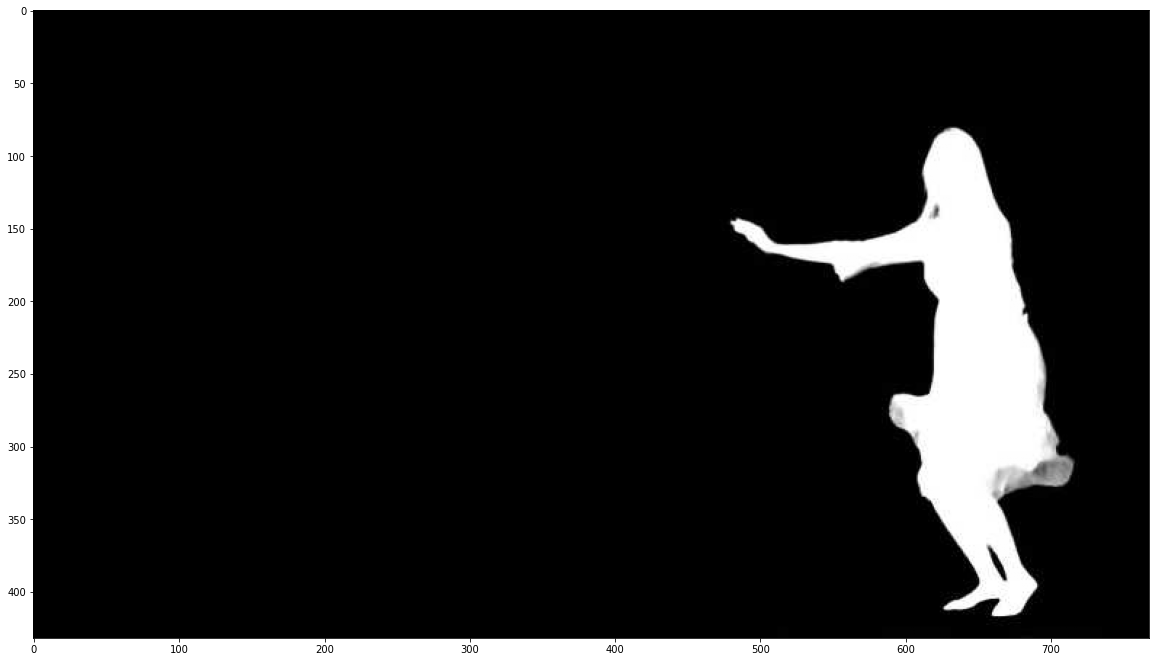

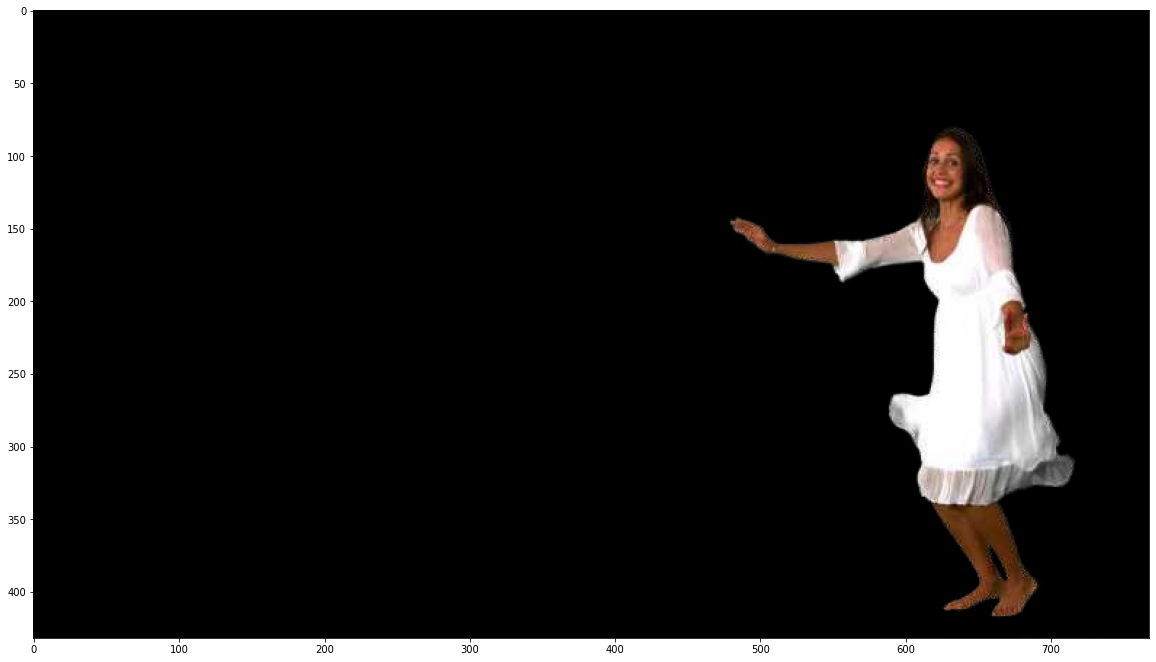

In [34]:
img_dir_id = '0000'
img_id = "00001"
fgr_dir = train_dir / "fgr"
matte_dir = train_dir / "pha"

fgr_img = jpeg.JPEG(fgr_dir / img_dir_id / f"{img_id}.jpg").decode() / 255.
matte_img = jpeg.JPEG(matte_dir / img_dir_id / f"{img_id}.jpg").decode() / 255.

plt.figure()
plt.imshow(fgr_img)
plt.figure()
plt.imshow(matte_img)
plt.figure()
plt.imshow(fgr_img * matte_img)

In [33]:
fgr_img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 68,  68,  68],
        [156, 156, 156],
        [ 76,  76,  76]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [ 30,  30,  30],
        [  8,   8,   8]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [ 43,  43,  43],
        [  0,   0,   0],
        [  3,   3,   3]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [246, 246, 246],
        [245, 245, 245],
        [245, 245, 245]]

In [36]:
pd.DataFrame(columns=["id"], data=train_subdirs).to_csv("../data/VideoMatteSD/train.csv", index=False)
pd.DataFrame(columns=["id"], data=val_subdirs).to_csv("../data/VideoMatteSD/val.csv", index=False)
pd.DataFrame(columns=["id"], data=test_subdirs).to_csv("../data/VideoMatteSD/test.csv", index=False)


In [50]:
pd.DataFrame(columns=["id"], data=train_subdirs).id.tolist()

['0093',
 '0327',
 '0409',
 '0141',
 '0412',
 '0468',
 '0121',
 '0335',
 '0031',
 '0029',
 '0340',
 '0367',
 '0022',
 '0214',
 '0311',
 '0397',
 '0341',
 '0185',
 '0003',
 '0108',
 '0073',
 '0353',
 '0294',
 '0148',
 '0373',
 '0243',
 '0433',
 '0434',
 '0169',
 '0045',
 '0120',
 '0455',
 '0358',
 '0132',
 '0023',
 '0436',
 '0417',
 '0254',
 '0388',
 '0323',
 '0334',
 '0390',
 '0077',
 '0441',
 '0042',
 '0204',
 '0057',
 '0252',
 '0425',
 '0179',
 '0339',
 '0008',
 '0426',
 '0069',
 '0221',
 '0096',
 '0146',
 '0362',
 '0147',
 '0197',
 '0314',
 '0086',
 '0381',
 '0356',
 '0033',
 '0070',
 '0283',
 '0020',
 '0324',
 '0084',
 '0040',
 '0115',
 '0024',
 '0312',
 '0196',
 '0161',
 '0151',
 '0091',
 '0466',
 '0187',
 '0290',
 '0384',
 '0224',
 '0094',
 '0418',
 '0239',
 '0250',
 '0230',
 '0376',
 '0392',
 '0034',
 '0126',
 '0454',
 '0267',
 '0273',
 '0013',
 '0234',
 '0375',
 '0422',
 '0193',
 '0058',
 '0403',
 '0276',
 '0156',
 '0143',
 '0257',
 '0453',
 '0128',
 '0259',
 '0281',
 '0445',
 

In [52]:
for train_subdir in train_subdirs:
    (Path("../data/VideoMatteSD/train") / "fgr" / train_subdir).mkdir(parents=True, exist_ok=True)
    (Path("../data/VideoMatteSD/train") / "pha" / train_subdir).mkdir(parents=True, exist_ok=True)
    shutil.copyfile(train_dir / "fgr" / train_subdir / "00001.jpg", Path("../data/VideoMatteSD/train") / "fgr" / train_subdir / "00001.jpg")
    shutil.copyfile(train_dir / "pha" / train_subdir / "00001.jpg", Path("../data/VideoMatteSD/train") / "pha" / train_subdir / "00001.jpg")